In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras import backend as K
K.set_image_dim_ordering('tf')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD, RMSprop, Adam

Using TensorFlow backend.


# Displays the images

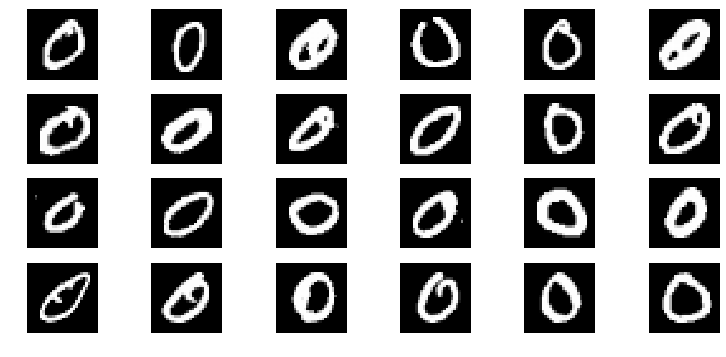

In [35]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os


directory = data_path+ '/' + data_dir_list[number]   # Our directory
plt.figure(figsize=(13,7.5))                         # figure size
columns = 6                                          # number of columns
number = 0                                           # which number to display 0-9
n = 24                                               # how many images to display

for i, image in enumerate(os.listdir(directory)[0:n]):                           # loop the image list
    image = imread(directory + '/' + image)                                      # read the image
    plt.subplot(len(os.listdir(directory)[0:n]) / columns + 1, columns, i + 1)   # creates subplots to display horizontally
    plt.imshow(image,cmap='Greys_r')                                             # shows the image in greyscale
    axis('off')                                                                  # turns off the axis

# Loading the images in from our directory

In [8]:
PATH = os.getcwd() # get current working directory
print(PATH)
data_path = PATH + '/training'  # gets the folder containing all the number folders
data_dir_list = os.listdir(data_path)

data_dir_list

C:\Users\Kelfun\Convolutional Image Classification


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [4]:
img_rows = 28
img_cols = 28
num_channel = 1

In [19]:
num_classes = 10

labels_name = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}


img_data_list = []
labels_list = []

for numbers in data_dir_list:
    img_list = os.listdir(data_path + '/' + numbers)
    print('Loading the images of dataset-' + '{}\n'.format(numbers))
    label = labels_name[numbers]
    for img in img_list:
        input_img = cv2.imread(data_path + '/' + numbers + '/' + img)
        input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize = cv2.resize(input_img, (img_rows,img_cols))
        img_data_list.append(input_img_resize)
        labels_list.append(label)

Loading the images of dataset-0

Loading the images of dataset-1

Loading the images of dataset-2

Loading the images of dataset-3

Loading the images of dataset-4

Loading the images of dataset-5

Loading the images of dataset-6

Loading the images of dataset-7

Loading the images of dataset-8

Loading the images of dataset-9



In [20]:
img_data = np.array(img_data_list)         # turn the images into a numpy array

img_data = img_data.astype('float32')      # change their data type into decimals

img_data /= 255                            # divide the entire numpy array by 255

print(img_data.shape)                      # training set of 60k and testing set of 10k

(60000, 28, 28)


## Setting the dimensions into (# of images, row_size,col_size,# of color_channel)

In [33]:
if num_channel == 1:
    if K.image_dim_ordering() == 'th':
        img_data = np.expand_dims(img_data, axis=1)
        print(img_data.shape)
    else:
        img_data = np.expand_dims(img_data, axis=4)
        print(img_data.shape)

else:
    if K.image_dim_ordering() == 'th':
        img_data = np.rollaxis(img_data, 3, 1)
        print(img_data.shape)
        
# it's 60k images, 28 row pixels, 28 column pixels, 1 color channel(gray-scale)

(60000, 28, 28, 1)


C:\Users\Kelfun\Anaconda3\envs\tf15\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  


In [28]:
np.set_printoptions(threshold= np.nan) # prints nontruncated outputs
labels = np.array(labels_list)

print(np.unique(labels, return_counts = True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


In [32]:
Y = np_utils.to_categorical(labels, num_classes) # One hot encoded the labels

In [34]:
x, y = shuffle(img_data, Y, random_state=2)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 12)

# Training the model using a Convolutional Network

### A total of 28 layers used

In [44]:
model = Sequential()

model.add(Convolution2D(32, (3,3), padding = 'same', input_shape = input_shape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, (3, 3), padding ="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis = -1))
model.add(Convolution2D(64, (3, 3), padding = "same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(128, (3, 3), padding = "same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis = -1))
model.add(Convolution2D(128, (3, 3), padding = "same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation("softmax"))


model.compile(Adam(lr = 0.0001), loss = 'categorical_crossentropy', metrics = ["accuracy"])


In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_9 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
activation_10 (Activation)   (None, 9, 9, 64)          0         
__________

In [46]:
hist = model.fit(X_train, y_train, batch_size=32, epochs=20,
                 verbose=1, validation_data=(X_test, y_test))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 70s 1ms/step - loss: 0.8953 - acc: 0.7309 - val_loss: 0.1363 - val_acc: 0.9593
Epoch 2/20
48000/48000 [==============================] - 61s 1ms/step - loss: 0.2627 - acc: 0.9199 - val_loss: 0.0911 - val_acc: 0.9745
Epoch 3/20
48000/48000 [==============================] - 66s 1ms/step - loss: 0.1733 - acc: 0.9480 - val_loss: 0.0686 - val_acc: 0.9818
Epoch 4/20
48000/48000 [==============================] - 81s 2ms/step - loss: 0.1298 - acc: 0.9606 - val_loss: 0.0547 - val_acc: 0.9833
Epoch 5/20
48000/48000 [==============================] - 82s 2ms/step - loss: 0.0998 - acc: 0.9695 - val_loss: 0.0476 - val_acc: 0.9874
Epoch 6/20
48000/48000 [==============================] - 86s 2ms/step - loss: 0.0865 - acc: 0.9743 - val_loss: 0.0432 - val_acc: 0.9870
Epoch 7/20
48000/48000 [==============================] - 87s 2ms/step - loss: 0.0717 - acc: 0.9776 - val_loss: 0.0420 - val_acc

# Visualizing Accuracy

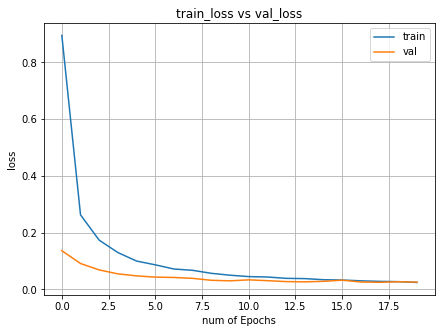

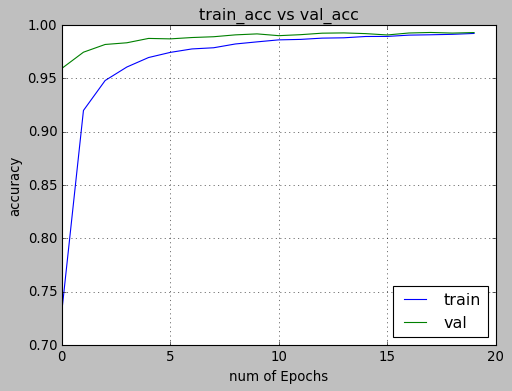

In [47]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['acc']
val_acc = hist.history['val_acc']
xc = range(20)

plt.figure(1, figsize=(7, 5))
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train', 'val'])
# print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
plt.savefig('trial_psi_loss.png', bbox_inches='tight')

plt.figure(2, figsize=(7, 5))
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train', 'val'], loc=4)
# print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
plt.savefig('trial_psi_acc.png', bbox_inches='tight')

In [48]:
# evaluate score
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])  # validation accuracy

Test Loss: 0.02547844766549982
Test accuracy: 0.9929166666666667


### Saving the weight and model into an hdf5 model

In [49]:
model.save('mnist.hdf5')

###  Load saved model

In [5]:
from keras.models import load_model


loaded_model = load_model('mnist.hdf5')

### Get number of layers

In [8]:
len(loaded_model.layers)

28

### Load in Test Set

In [9]:
img_rows = 28
img_cols = 28
num_channel = 1

PATH = os.getcwd() # get current working directory
print(PATH)
data_path = PATH + '/testing'  #gets the folder containing all the test number folders
data_dir_list = os.listdir(data_path)


num_classes = 10

labels_name = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}


test_img_data_list = []
test_labels_list = []

for numbers in data_dir_list:
    img_list = os.listdir(data_path + '/' + numbers)
    print('Loading the images of dataset-' + '{}\n'.format(numbers))
    label = labels_name[numbers]
    for img in img_list:
        input_img = cv2.imread(data_path + '/' + numbers + '/' + img)
        input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize = cv2.resize(input_img, (img_rows,img_cols))
        test_img_data_list.append(input_img_resize)
        test_labels_list.append(label)

C:\Users\Kelfun\Convolutional Image Classification
Loading the images of dataset-0

Loading the images of dataset-1

Loading the images of dataset-2

Loading the images of dataset-3

Loading the images of dataset-4

Loading the images of dataset-5

Loading the images of dataset-6

Loading the images of dataset-7

Loading the images of dataset-8

Loading the images of dataset-9



# Always make sure the input dimensions of your data is the same as the x_train data used to train the model

### Our model originally had 4 dimensions of input (# of images, row, column, color_channel)

### Hence just apply the same steps you did to the testing data set before inputting it into the model for prediction

In [32]:
img_data = np.array(test_img_data_list)

img_data = img_data.astype('float32')

img_data /= 255

if num_channel == 1:
    if K.image_dim_ordering() == 'th':
        img_data = np.expand_dims(img_data, axis=1)
        print(img_data.shape)
    else:
        img_data = np.expand_dims(img_data, axis=4)
        print(img_data.shape)

else:
    if K.image_dim_ordering() == 'th':
        img_data = np.rollaxis(img_data, 3, 1)
        print(img_data.shape)

# Want the test img data to have the same dimensions

(10000, 28, 28, 1)


C:\Users\Kelfun\Anaconda3\envs\tf15\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  if sys.path[0] == '':


## Sanity Check

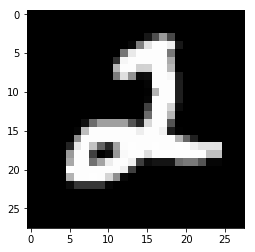

This should be a 2


In [49]:
plt.gray()

n = 3000

plt.imshow(test_img_data_list[n], interpolation='nearest')
plt.show()

print('This should be a {}'.format(test_labels_list[n]))

In [38]:
prediction = loaded_model.predict_classes(img_data)

In [41]:
np.set_printoptions(suppress=True) 
print(prediction[0])
print(test_labels_list[0])

0
0


# Prediction Accuracy

In [47]:
accuracy = sum(prediction == test_labels_list)/len(test_labels_list)
print('Accuracy of {}%'.format(accuracy *100))

# This is close enough to perfect for me but you can attempt to improve the model by playing with it's parameters.

Accuracy of 99.44%
